This project aims to predict customer churn using various ML models and chooses the best out of them

I aim to develop a predictive model that identifies high-risk customers likely to churn, to proactively offer targeted retention incentives and reduce customer attrition.

Next Step: Import modules and data and analyse the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("cust_data.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The above data shows that the datatypes and it seems to be proper for the data it holds

Next step : Check the null and duplicate data

In [4]:
numeric_features = ['Age', 'Tenure', 'EstimatedSalary']
categorical_features = ['Geography','Gender']
binary_features = ['HasCrCard','IsActiveMember']

In [5]:
print("--Null rows--")
print(data.isnull().sum())
print("--Duplicate rows rows--")
print(data.duplicated().sum())

--Null rows--
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
--Duplicate rows rows--
0


# Exploratory Data Analysis

In this step we find out if the data is skewed, class imbalance, relationship between features and output 

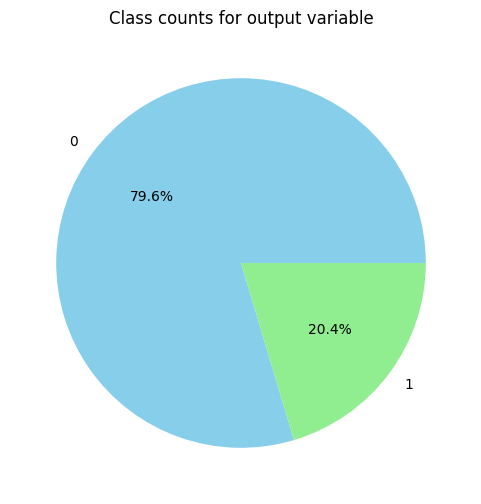

In [6]:
plt.figure(figsize=(6,6))
counts = data.Exited.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Class counts for output variable')
plt.show()

The targer column seems to be imbalanced as customer churn is nearly 20%. This tells us that accuracy might not be the right metric and we need to use class imbalance ratio while tuning the ML models or use balancing techniques like SMOTE

Plots for Categorical Features vs the output expected value


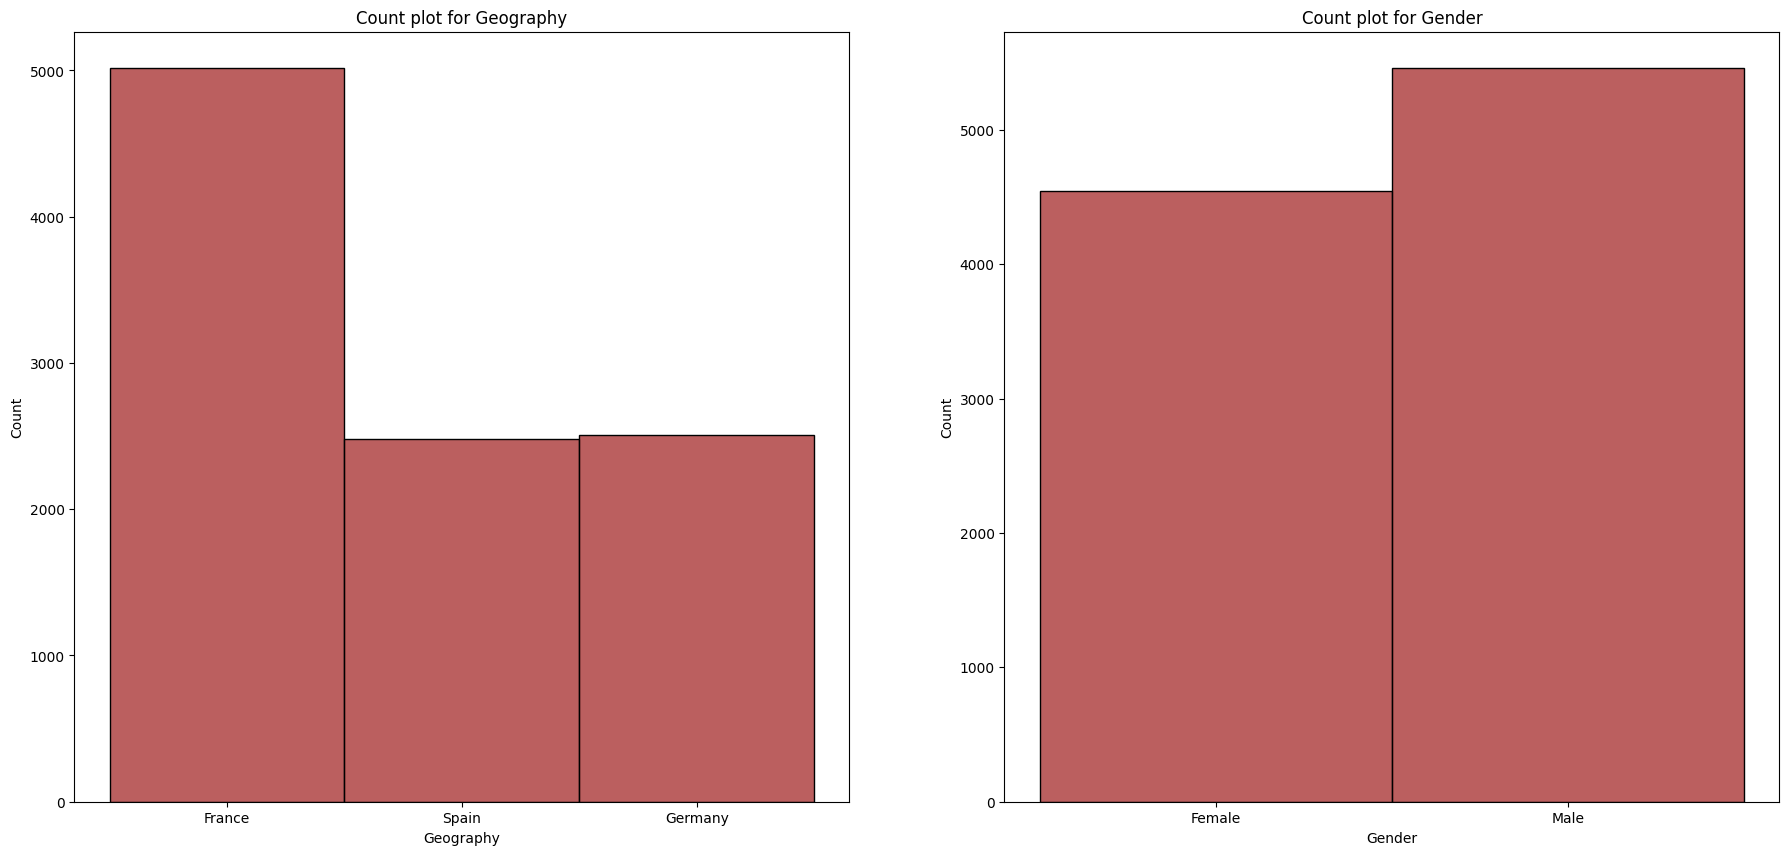

In [7]:
print("Plots for Categorical Features vs the output expected value")
plt.figure(figsize=(22,22))
for i, col in enumerate(categorical_features):
    plt.subplot(2,2, i+1)
    sns.histplot(x=data[col], data=data, color="brown")
    plt.title(f"Count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.show()

- The histogram shows that customer base distribution is nearly balanced on gender and isActiveMember.
- The HasCrCard and country distribution is not

More analysis is required to find any correlation with respect to the output variable


Relationship between variables independently on the Exited column


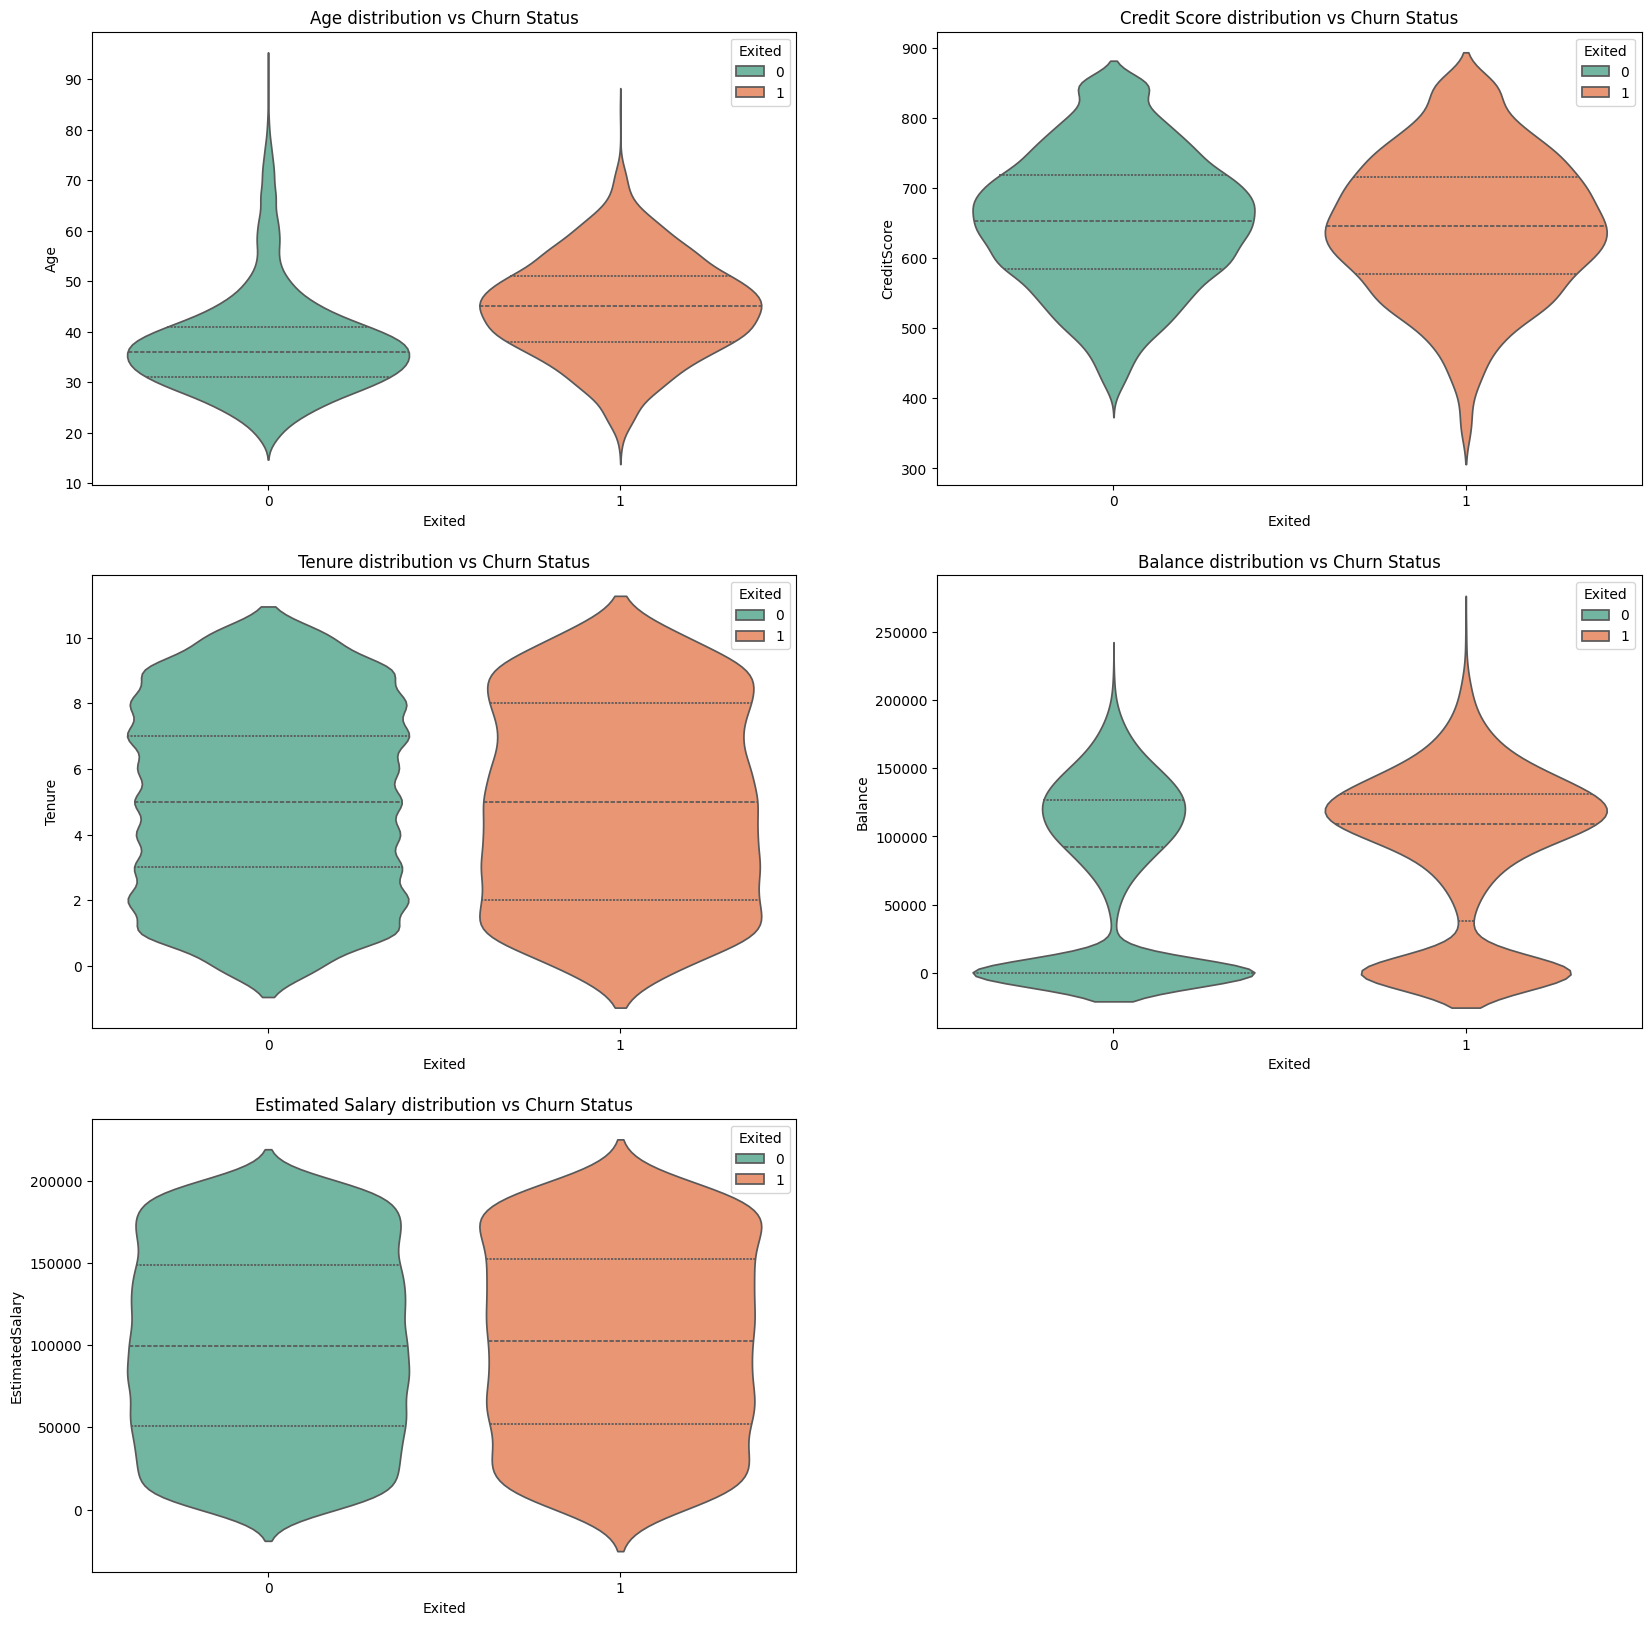

In [8]:
print("Relationship between variables independently on the Exited column")

fig, axes = plt.subplots(3,2,figsize = (20,20))

sns.violinplot(data=data, x='Exited', y='Age', palette='Set2', ax=axes[0,0], inner="quart", hue='Exited')
axes[0,0].set_title("Age distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='CreditScore' ,palette='Set2', ax=axes[0,1], inner="quart", hue='Exited')
axes[0,1].set_title("Credit Score distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='Tenure', palette='Set2', ax=axes[1,0], inner="quart", hue='Exited')
axes[1,0].set_title("Tenure distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='Balance', palette='Set2', ax=axes[1,1], inner="quart", hue='Exited')
axes[1,1].set_title("Balance distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='EstimatedSalary', palette='Set2', ax=axes[2,0], inner="quart", hue='Exited')
axes[2,0].set_title("Estimated Salary distribution vs Churn Status")

axes[2,1].axis('off')
plt.show()


- The credit score distribution seems almost similar indicating it might not be a strong predictor
- The Age shows that older people tend to churn more than younger
- The Tenure qurantile suggests that people with shorter tenure tend to churn more than the people with longer tenure
- The balance plot shows customer with higher balance churn most on average. 
- The estimated salary is similar and does not suggest that salary is main feature predicting the churn 

Plot for numerical features


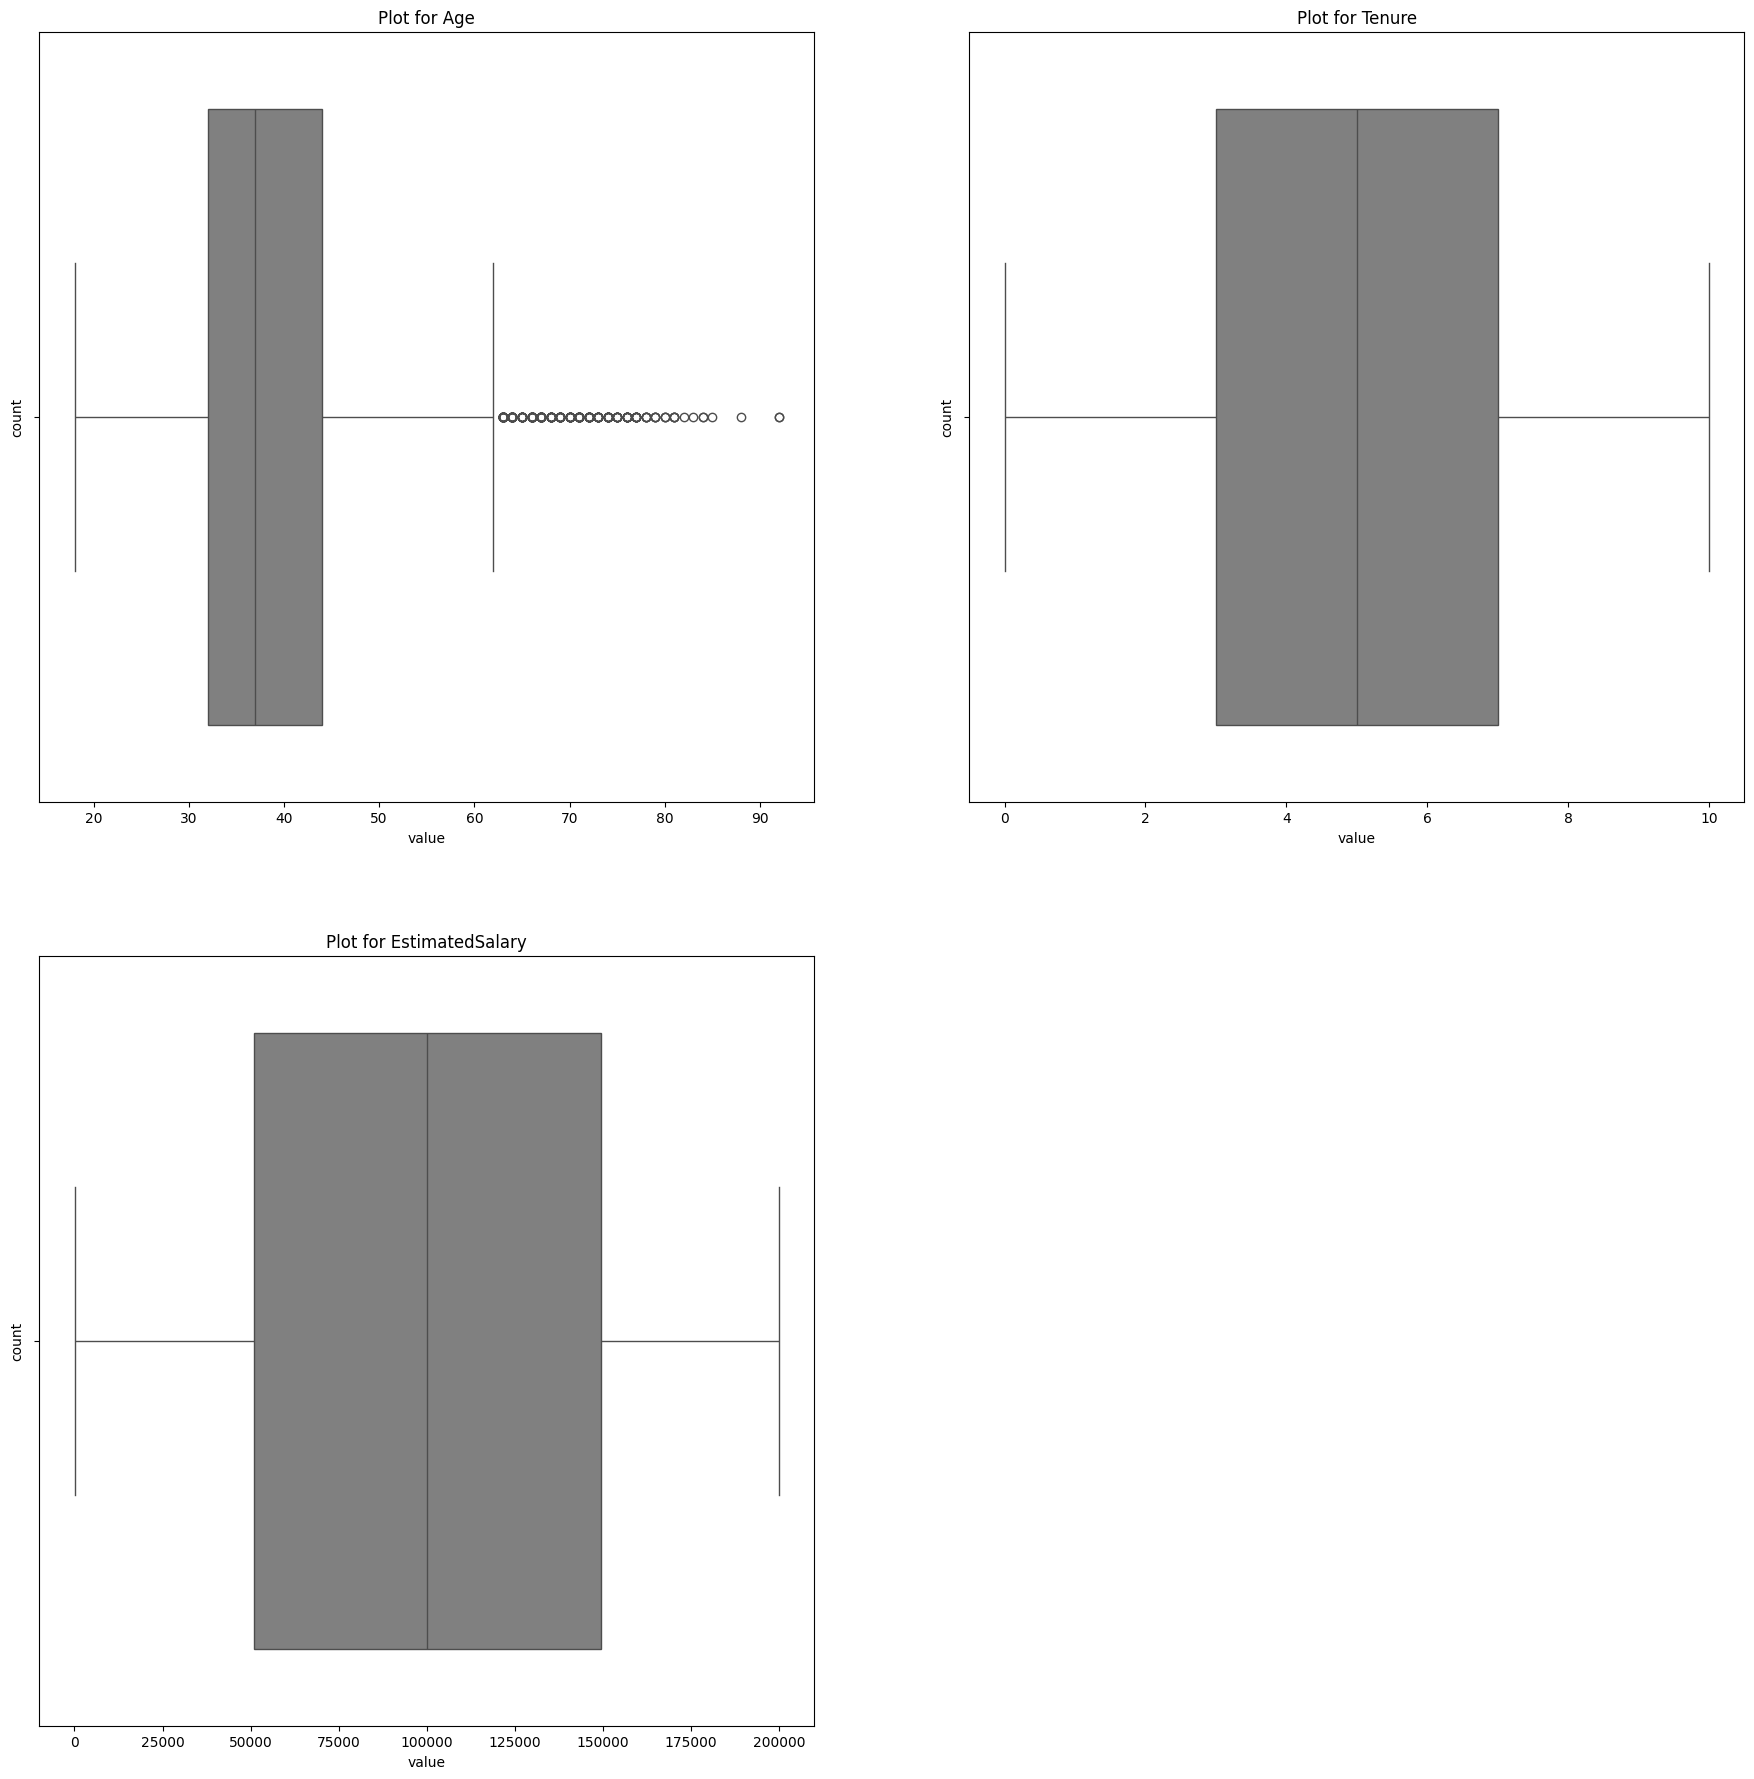

In [9]:
print("Plot for numerical features")
plt.figure(figsize=(22,22))
for i, col in enumerate(numeric_features):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=data[col], color="grey")
    plt.title(f"Plot for {col}")
    plt.xlabel('value')
    plt.ylabel("count")

- The plots above show that Age has some outliers, However, this is okay as we are targetting people across age groups
- The other numerical features shows no outliers

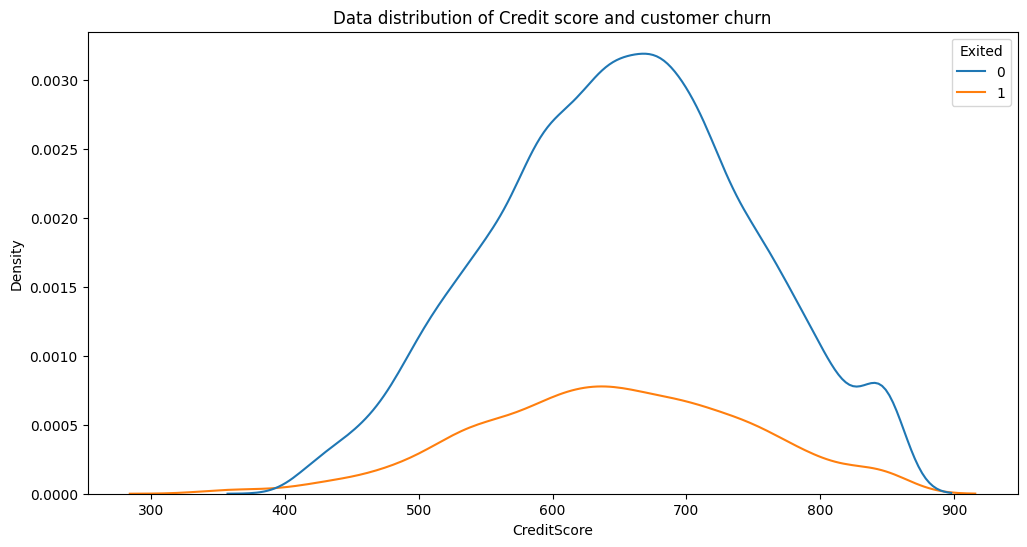

In [10]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=data, x='CreditScore', hue='Exited')
plt.title("Data distribution of Credit score and customer churn")
plt.show()

- The graph shows that customer churn distribution follows similar pattern except that class is imbalanced. This shows that credit score is not a direct predictor for churn

In [11]:
bins = [18, 22, 50, 60, 1000] 
labels = ['18-22', '22-50', '50-60', '>60']

data['AgeGroup'] = pd.cut(data.Age, bins=bins, labels=labels, right=False, include_lowest=True)


In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,22-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,22-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,22-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,22-50
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,22-50


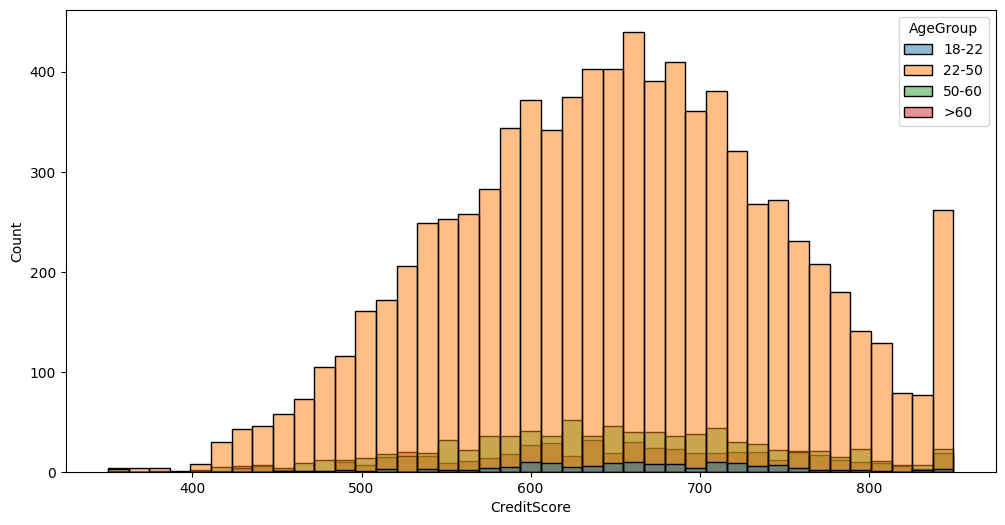

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='CreditScore', hue='AgeGroup')
plt.show()

- This show that Age between 18-22 makes up small fraction of whole customers and also mostly lower credit score
- The age group between 22-50 makes up most of the customer and the credit score is averaged
- The age group between 50-60 has a good range of credit score
- The customer above 60 have lower credit score

Customer Age group vs the Exited column


<Axes: xlabel='AgeGroup', ylabel='Count'>

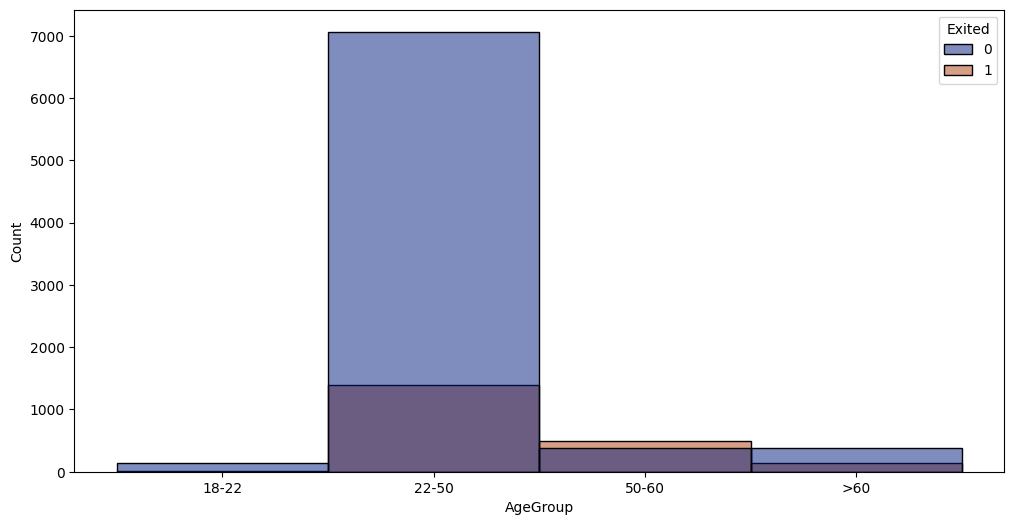

In [14]:
plt.figure(figsize=(12,6))

print("Customer Age group vs the Exited column")
sns.histplot(data=data, x='AgeGroup', hue='Exited', palette="dark")

- This adds to above findings that the majority of customer base is between 22-50 years of age
- Also, older customers are risk of higher churn   

Checking the correlation between the numerical features and also some features. Adding new features like credit score, 

In [15]:
# Check how credit utilisation is per customer
data['CreditUtilisation']=data.Balance/data.CreditScore
# Balance to salary ratio to understand the balance is impacted to salary
data['BalanceToSalaryRatio']=data.Balance/data.EstimatedSalary
# How credit score impacts with Age. This helps to understand if credit score differs with age
data['CreditScoreAgeInteraction']=data.CreditScore*data.Age

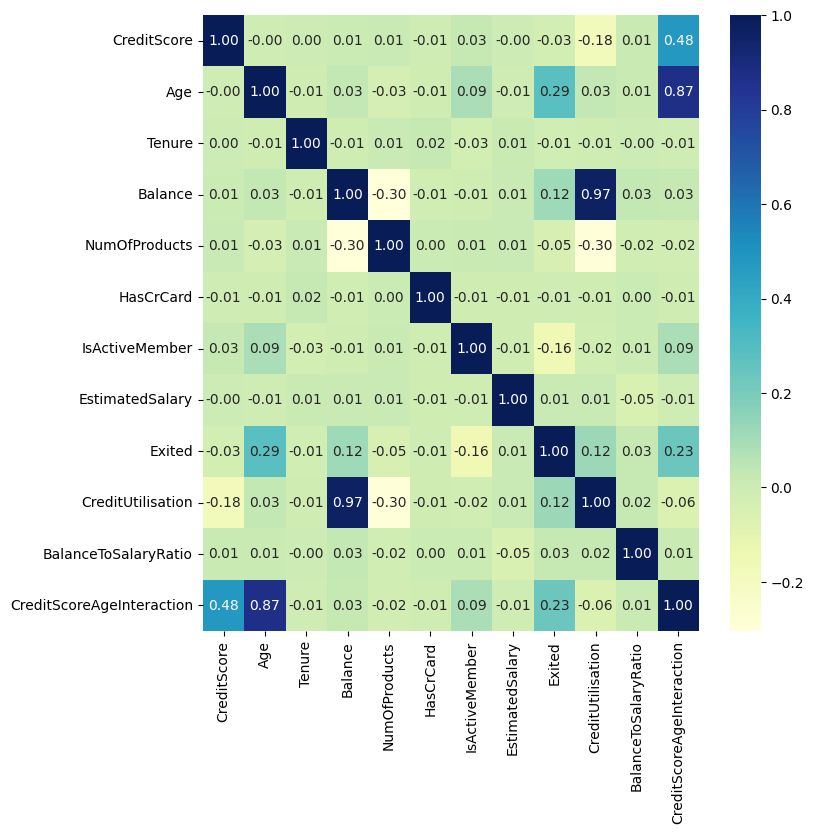

In [16]:
data.head()
plt.figure(figsize = (8,8))
sns.heatmap(data.drop(['RowNumber','CustomerId', 'AgeGroup', 'Surname', 'Gender', 'Geography'],axis=1).corr(), annot=True, fmt='.2f',cmap='YlGnBu')
plt.show()

- Moderate positive relationship between Age and Exited, again confirming above findings
- Balance and CreditUtilisation shows strong positive relationship 
- CreditScoreInteraction and CreditUtilisation also shows moderate relationship to Exited
- isActiveMember has a negative correlation indicating active members are less likely to churn  

In [17]:
bins = [0,700,750,1000]
labels = ['Low', 'Medium', 'High']

data['CreditScoreGroup'] = pd.cut(data.CreditScore, bins=bins, labels=labels, right=False, include_lowest=True)

In [18]:
categorical_features.extend(['AgeGroup', 'CreditScoreGroup'])
numeric_features.extend(['CreditUtilisation','BalanceToSalaryRatio','CreditScoreAgeInteraction'])

In [19]:
categorical_features

['Geography', 'Gender', 'AgeGroup', 'CreditScoreGroup']

In [20]:
col_dropped = ['Exited', 'RowNumber', 'CustomerId', 'Surname']
X = data.drop(col_dropped, axis =1)
y = data.Exited

ML Trainig, Tuning and Testing

All imports for machine learning training

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, 
                             RocCurveDisplay, precision_score, recall_score, f1_score,
                             average_precision_score, classification_report)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier


In [22]:
X_tune, X_test, y_tune, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tune,y_tune, test_size=0.2, stratify=y_tune, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(6400, 15) (1600, 15) (2000, 15)
(6400,) (1600,) (2000,)


In [23]:
numeric_preprocess = Pipeline(steps=[
    ("scaler", StandardScaler())
])
data_processor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocess, numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

### Models Chosen
1. **Logistic Regression** - This is the most basic model, linear and this can be used as a baseline to understand and interpret results. Using class_wight='balanced' forces it to treat minority class with same importance as that of majority.  
**Goal:** To achieve the highest possible Recall with low computational cost
2.  **Random Forest** - It uses multiple decision trees to capture non-linear relationships. It’s excellent for handling outliers in features
**Goal:** To provide a stable, high-accuracy prediction that reduces noise.
3. **XG Boost-** It uses cost-sensitive learning via scale_pos_weight. It is considered best for tabular data
**Goal:** To maximize the F1-Score (balancing Precision and Recall) to ensure retention offers aren't wasted on the wrong people
4. **Gradient Boosting-** This uses SMOTE (Synthetic Minority Over-sampling Technique) to create fake churn cases. This gives the model more examples to learn from.
**Goal:** To see if synthesising data allows the Gradient Boosting algorithm to overcome its natural bias toward the majority class

In [26]:


models = {
        "lr_pl" : ImbPipeline([
        ("preprocessor", data_processor),
        ("classifier", LogisticRegression(penalty='l1', 
                                            solver='liblinear', 
                                            max_iter=1000, 
                                            random_state=42,
                                            class_weight='balanced'
    ))
    ]),
        "rf_pl" : ImbPipeline([
        ("preprocessor", data_processor),
        ("classifier", RandomForestClassifier(n_estimators=200, 
                                              random_state=42, 
                                              n_jobs=-1, 
                                              oob_score=True, 
                                              bootstrap=True,
                                              class_weight = 'balanced'
        ))    
    ]),
        "xg_boost": ImbPipeline([
        ("preprocessor", data_processor),
        ("classifier", XGBClassifier( 
                                     eval_metric='logloss', 
                                     scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), 
                                     random_state=42
        ))
    ]),
        "gradient_boosting": ImbPipeline([
        ("preprocessor", data_processor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", GradientBoostingClassifier(random_state=42,
                                                  learning_rate=0.05,
                                                  n_estimators=50
        ))
    ])
}

In [27]:
results_list = []
for name, model in models.items():
    print(f"Model: {name}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(classification_report(y_val,y_pred), '\n')
    print("confusion_matrix:")
    print(confusion_matrix(y_val, y_pred),'\n')
    accuracy = accuracy_score(y_val,y_pred)
    print(f"Accuracy Score: {accuracy} \n ")
    recall = recall_score(y_val,y_pred, pos_label=1)
    print(f"Recall Score: {recall} \n ")
    f1 = f1_score(y_val, y_pred, pos_label=1)
    print(f"F1 Score Score: {f1} \n ")

    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_val,model.predict_proba(X_val)[:,1])
        print(f"ROC AUC Score: {roc_auc}")
    else: 
        roc_auc = "None"

    results_list.append({'Model': name, 
        'Accuracy': accuracy, 
        'Recall Score': recall, 
        'F1 Score': f1, 
        'ROC AUC Score': roc_auc})
    print("-" * 50,'\n')


Model: lr_pl
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1274
           1       0.40      0.71      0.51       326

    accuracy                           0.72      1600
   macro avg       0.65      0.72      0.66      1600
weighted avg       0.80      0.72      0.75      1600
 

confusion_matrix:
[[925 349]
 [ 96 230]] 

Accuracy Score: 0.721875 
 
Recall Score: 0.7055214723926381 
 
F1 Score Score: 0.5082872928176796 
 
ROC AUC Score: 0.7770054222727316
-------------------------------------------------- 

Model: rf_pl
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1274
           1       0.79      0.41      0.54       326

    accuracy                           0.86      1600
   macro avg       0.83      0.69      0.73      1600
weighted avg       0.85      0.86      0.84      1600
 

confusion_matrix:
[[1238   36]
 [ 193  133]] 

Accuracy Score: 0.856875 
 
Recall Sc

Results: 
- **Logistic Regression** - This gives highest Recall effectively helping to predict customers with highest churn possibility thereby helping to retain them
- **Random Forest**- The recall score of is poor. 
- **XG Boost** - This gives best possible middle ground with highest F1 Score and its best possible recall.
- **Gradient Boosting** - the recall is poor.

Try to use some hyperparameters and tune these models to see if the result can be better then we can choose final model to test the testing accuracy.

As we know onboarding new customers is a long process and depends on many factors. I am choosing **Recall** as the metric to tune so that we try the most to retain the customers.

In [28]:
param_grids = {
    "lr_pl": {
        "classifier__C": [0.01, 0.1, 1, 10],
        "classifier__penalty": ['l1', 'l2'],
        "classifier__class_weight": [{0:1,1:5}, {0:1,1:2}]
    },
    "rf_pl": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [None, 10, 20],
        "classifier__min_samples_leaf": [1, 2, 4],
        "classifier__class_weight": [{0:1,1:5}, {0:1,1:10}]
    },
    "xg_boost": {
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 5, 7],
        "classifier__n_estimators": [100, 200],
        "classifier__class_weight": [{0:1,1:5}, {0:1,1:10}]
    }
    ,
    "gradient_boosting": {
        "smote__k_neighbors": [3, 7],
        "classifier__n_estimators": [100, 200],
        "classifier__learning_rate": [0.01, 0.1],
        "classifier__max_depth": [5, 8],
        "classifier__subsample": [0.8, 1.0]
    }
}


In [29]:
results_list = []

for name, pipeline in models.items():
    print(f"Tuning Model: {name}")
    
    grid_search = GridSearchCV(
        pipeline, 
        param_grid=param_grids[name], 
        cv=5, 
        scoring='recall',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    
    results_list.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'f1_score': f1_score(y_val, y_pred),
        'ROC AUC': roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1]) if hasattr(best_model, "predict_proba") else None,
        'best_model': best_model
    })

results_df = pd.DataFrame(results_list)

Tuning Model: lr_pl
Tuning Model: rf_pl
Tuning Model: xg_boost


C:\Users\shash\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [18:10:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuning Model: gradient_boosting


In [30]:
results_df[['Model','Accuracy', 'Recall', 'Precision', 'f1_score', 'ROC AUC']]

,Model,Accuracy,Recall,Precision,f1_score,ROC AUC
0,lr_pl,0.667500,0.763804,0.353693,0.483495,0.777179
1,rf_pl,0.752500,0.797546,0.440678,0.567686,0.850661
2,xg_boost,0.789375,0.720859,0.488565,0.582404,0.857343
3,gradient_boosting,0.847500,0.503067,0.666667,0.573427,0.847397


From the result after hypertuning on the churn prediction dataset, we can infer the following:

1. **Random Forest**- Performs well with highest Recall and F1-Score. This shows that this is the best performing model with high ROC AUC.
2. **XGBoost** - The second best model with second highest Recall and f1_score. The ROC AUC is the best for this model
3. **Logistic Regression** - This is the third best model with high Recall but lower Precision that has brought down the F1-score as well. This model has a moderate ROC AUC as well
4. **Gradient Boosting** - This is the least performance model with lowest Recall, F1-Score

As stated earlier, as I prefer Recall to be most important metric I will go with Random forest with the best parameters that is obtained during hyperparameter tuning to test the data across the test dataset

In [31]:
best_model = results_df['best_model'][1]
best_model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Concatenate the full dataset for training using X_train and X_val so that we have all data except test that is trained using the best model

In [32]:
X_full = pd.concat([X_train,X_val])
y_full = pd.concat([y_train,y_val])

In [33]:
best_model.fit(X_full,y_full)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred), '\n')
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred),'\n')
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {accuracy} \n ")
precision = precision_score(y_test,y_pred)
print(f"Precision Score: {precision} \n ")
recall = recall_score(y_test,y_pred, pos_label=1)
print(f"Recall Score: {recall} \n ")
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1 Score Score: {f1} \n ")

if hasattr(model, "predict_proba"):
    roc_auc = roc_auc_score(y_test,best_model.predict_proba(X_test)[:,1])
    print(f"ROC AUC Score: {roc_auc}")
else: 
    roc_auc = "None"

results_list.append({'Model': name, 
    'Accuracy': accuracy,
    'Precision': precision, 
    'Recall Score': recall, 
    'F1 Score': f1, 
    'ROC AUC Score': roc_auc})

              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1593
           1       0.43      0.82      0.56       407

    accuracy                           0.74      2000
   macro avg       0.68      0.77      0.69      2000
weighted avg       0.84      0.74      0.76      2000
 

confusion_matrix:
[[1149  444]
 [  73  334]] 

Accuracy Score: 0.7415 
 
Precision Score: 0.42930591259640105 
 
Recall Score: 0.8206388206388207 
 
F1 Score Score: 0.5637130801687764 
 
ROC AUC Score: 0.8568429754870434


From the above, we see that the model has done well to get highest Recall of 0.8206 on test data. This means
Out of 100 people who are likely to churn the probability that this model flags 82 people which can help the banking officials and systems to have a contact with customer, understand what the reason, asses the reason and try to avoid the customer leaving.
  

Ranks: 
cat__AgeGroup_>60                 0.004003
cat__CreditScoreGroup_Medium      0.005250
cat__CreditScoreGroup_Low         0.005582
remainder__HasCrCard              0.007827
cat__Geography_Spain              0.010066
cat__AgeGroup_22-50               0.018174
cat__Gender_Male                  0.021386
cat__AgeGroup_50-60               0.022732
cat__Geography_Germany            0.035803
num__Tenure                       0.037519
remainder__IsActiveMember         0.040953
num__BalanceToSalaryRatio         0.052650
num__EstimatedSalary              0.062049
num__CreditUtilisation            0.064760
remainder__CreditScore            0.067901
remainder__Balance                0.071229
num__CreditScoreAgeInteraction    0.115500
remainder__NumOfProducts          0.158656
num__Age                          0.197959
dtype: float64


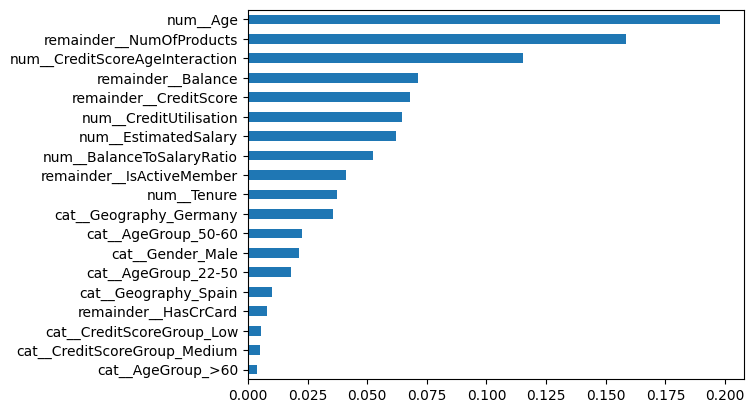

In [77]:
import shap


classifier = best_model.named_steps['classifier']
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
importances = classifier.feature_importances_
feat_ranks = pd.Series(importances, index=feature_names)
feat_ranks.sort_values(inplace=True)

print("Ranks: ")
print(feat_ranks) # as text

plot=feat_ranks.plot(kind="barh")

The above feature importance and the graph shows how each feature has contributed towards the prediction

1. **num_Age**: This is the most important feature, with an importance score near 0.200. This suggests that a person's age is the primary factor the model uses to make its prediction.
2. **remainder_NumOfProducts**: This is the second most important feature, with a score of approximately 0.170.
3. **num_CreditScoreAgeInteraction**: This interaction term is the third most important feature, around 0.110.

['num__Age' 'num__Tenure' 'num__EstimatedSalary' 'num__CreditUtilisation'
 'num__BalanceToSalaryRatio' 'num__CreditScoreAgeInteraction'
 'cat__Geography_Germany' 'cat__Geography_Spain' 'cat__Gender_Male'
 'cat__AgeGroup_22-50' 'cat__AgeGroup_50-60' 'cat__AgeGroup_>60'
 'cat__CreditScoreGroup_Low' 'cat__CreditScoreGroup_Medium'
 'remainder__CreditScore' 'remainder__Balance' 'remainder__NumOfProducts'
 'remainder__HasCrCard' 'remainder__IsActiveMember']


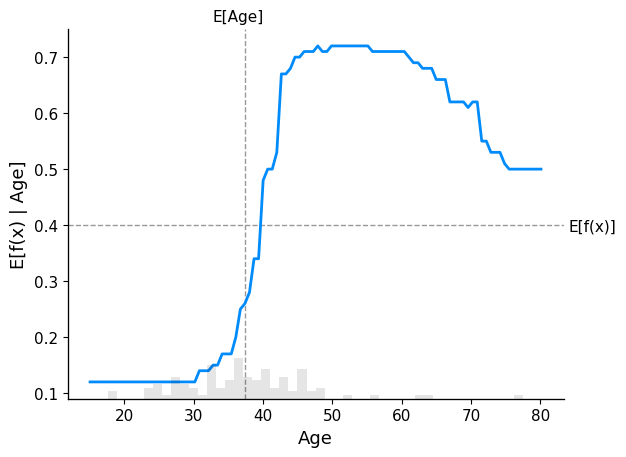

100%|===================| 12786/12800 [07:50<00:00]        

In [88]:
X100 = shap.utils.sample(X_train, 100)
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
print(feature_names)
X100_processed = pd.DataFrame(
    best_model.named_steps['preprocessor'].transform(X100), 
    columns=feature_names
)
shap.plots.partial_dependence(
    "Age", best_model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

for col in X100_processed.select_dtypes(include='bool').columns:
    X100_processed[col] = X100_processed[col].astype(int)


explainer = shap.TreeExplainer(classifier, X100_processed)
X_train_processed = best_model.named_steps['preprocessor'].transform(X_train)
shap_values = explainer(X_train_processed, check_additivity=False)



1. Low Churn(Ages 20–35): Customers in this age bracket have the lowest predicted churn probability (around 0.12), well below the average. This is because of fewer customers with credit card at this age bracket.
2. Rapid Churn(Ages 35–45): The predicted churn probability increases steeply.
3. Peak Churn(Ages 45–60): This middle-aged segment shows the highest predicted churn probability (peaking around 0.70). The model identifies this group as the highest risk.

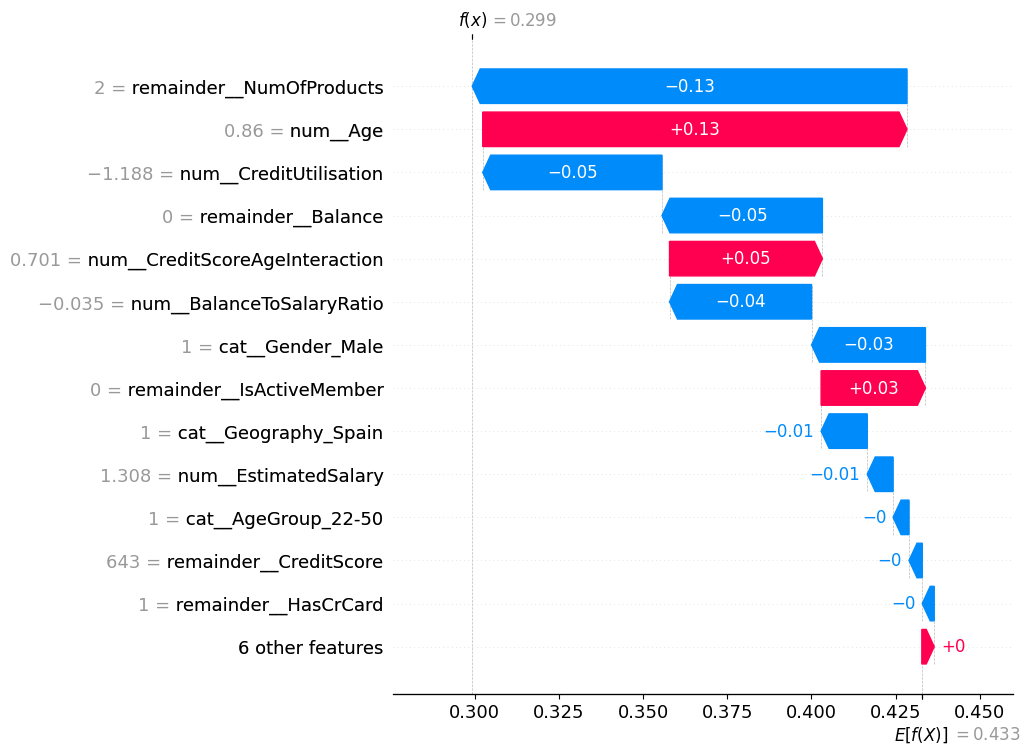

In [68]:
sample_ind = 30
shap.plots.waterfall(shap_values[sample_ind,:,1], max_display=14)

This graph can be used to understand how each prediction is made by the model. this helps to explain to business on how the decision is made